Tensor

In [1]:
from __future__ import print_function
import torch as t
t.__version__

'1.13.0'

In [2]:
# 构建5 x 3矩阵, 只分配了空间, 没有初始化
x = t.Tensor(5, 3)
x

tensor([[1.0469e-38, 1.0653e-38, 1.0469e-38],
        [4.2246e-39, 1.0286e-38, 1.0653e-38],
        [1.0194e-38, 8.4490e-39, 1.0469e-38],
        [9.3674e-39, 9.9184e-39, 8.7245e-39],
        [9.2755e-39, 8.9082e-39, 9.9184e-39]])

In [3]:
#使用0 1 巨晕分布随即初始化二维数组
x = t.rand(5, 3)
x

tensor([[0.4581, 0.4305, 0.7200],
        [0.5199, 0.1090, 0.0375],
        [0.8525, 0.5224, 0.4763],
        [0.8847, 0.4962, 0.9043],
        [0.2382, 0.5198, 0.2610]])

In [4]:
print(x.size()) #产看x的形状
x.size()[1], x.size(1) #查看列数, 两个方法都可

torch.Size([5, 3])


(3, 3)

In [5]:
y = t.rand(5, 3)

In [6]:
x + y

tensor([[0.9883, 1.0845, 1.2241],
        [1.3170, 0.4753, 0.6006],
        [1.5868, 0.5848, 1.2820],
        [1.2007, 0.8254, 1.5545],
        [0.6770, 0.9336, 1.2231]])

In [7]:
t.add(x, y)

tensor([[0.9883, 1.0845, 1.2241],
        [1.3170, 0.4753, 0.6006],
        [1.5868, 0.5848, 1.2820],
        [1.2007, 0.8254, 1.5545],
        [0.6770, 0.9336, 1.2231]])

In [8]:
result = t.Tensor(5, 3)
t.add(x, y, out=result)
result

tensor([[0.9883, 1.0845, 1.2241],
        [1.3170, 0.4753, 0.6006],
        [1.5868, 0.5848, 1.2820],
        [1.2007, 0.8254, 1.5545],
        [0.6770, 0.9336, 1.2231]])

In [9]:
print("origin y")
print(y)

print('unchange y value')
y.add(x)
print(y)

print('change y value')
y.add_(x)
print(y)

origin y
tensor([[0.5302, 0.6540, 0.5041],
        [0.7971, 0.3663, 0.5631],
        [0.7343, 0.0624, 0.8057],
        [0.3160, 0.3293, 0.6502],
        [0.4388, 0.4138, 0.9621]])
unchange y value
tensor([[0.5302, 0.6540, 0.5041],
        [0.7971, 0.3663, 0.5631],
        [0.7343, 0.0624, 0.8057],
        [0.3160, 0.3293, 0.6502],
        [0.4388, 0.4138, 0.9621]])
change y value
tensor([[0.9883, 1.0845, 1.2241],
        [1.3170, 0.4753, 0.6006],
        [1.5868, 0.5848, 1.2820],
        [1.2007, 0.8254, 1.5545],
        [0.6770, 0.9336, 1.2231]])


In [10]:
y[:, 0] # 支持切片操作, tensor 涵盖了 numpy的方法

tensor([0.9883, 1.3170, 1.5868, 1.2007, 0.6770])

In [11]:
a = t.ones(5) #生成全是1 的向量
a

tensor([1., 1., 1., 1., 1.])

In [12]:
import numpy as np
b = a.numpy() # tensor -> numpy
print(b)
print(type(b))

[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [13]:
a = np.ones(6)
b = t.from_numpy(a) #numpy -> tensor
print(a)
print(b)


[1. 1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1., 1.], dtype=torch.float64)


#### 转换前后的 tensor 和 numpy共享内存， 转换速度快， 几乎不消耗其他资源， 但是任何操作都会同时导致两个
#### 对象的改变

In [14]:
b.add(1)
print(a)
print(b)


[1. 1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1., 1.], dtype=torch.float64)


In [15]:
b.add_(1)
print(a)
print(b)

[2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2.], dtype=torch.float64)


In [16]:
c = b;
b.add_(2)
print(a)
print(b)
print(c)

[4. 4. 4. 4. 4. 4.]
tensor([4., 4., 4., 4., 4., 4.], dtype=torch.float64)
tensor([4., 4., 4., 4., 4., 4.], dtype=torch.float64)


##### 可见a, b, c共享内存
##### 若只想获取一个值 可以使用scalar.item

In [17]:
d = a[1]
d = 10
print(a)
print(b)
print(c)
print(d)

[4. 4. 4. 4. 4. 4.]
tensor([4., 4., 4., 4., 4., 4.], dtype=torch.float64)
tensor([4., 4., 4., 4., 4., 4.], dtype=torch.float64)
10


In [18]:
scalar = b[0]
scalar

tensor(4., dtype=torch.float64)

In [19]:
scalar.size()

torch.Size([])

In [20]:
scalar.item()

4.0

In [21]:
tensor = t.tensor([2])

In [22]:
tensor, scalar

(tensor([2]), tensor(4., dtype=torch.float64))

In [23]:
#只有一个元素的tensor也可以调用item()方法
t1 = t.tensor([1, 2])
t2 = t.tensor([3])

In [24]:
t1.item()

ValueError: only one element tensors can be converted to Python scalars

In [ ]:
t2.item()

In [ ]:
old_tensor = t.tensor([1,2,3])
new_tensor = old_tensor.clone()
new_tensor[0] = 11111
old_tensor, new_tensor

#### t.tensor() 和 tensor.clone() 总是会进行数据拷贝, 新旧tensor不共享内存
#### 如果要共享内存可以使用 tensor.from_numpy() 或者 tensor.detach()来新建一个tensor
#### 二者共享内存

In [ ]:
new_tensor2 = old_tensor.detach()
new_tensor2[2] = 3333
old_tensor, new_tensor, new_tensor2

#### tensor可以通过 .cuda方法转为GPU的tensor，从而享受GPU带来的加速运算

## autograd：自动微分

##### 深度学习的算法本质是通过反向传播求倒数，而pytorch的autograd模块则实现了这个功能
##### tensor上的所有操作 autograd都能自动的计算 微分
##### 从0.4起Variable正式并入Tensor，说明Tensor也能进行自动机打算微分的操作
##### 使用Tensor的autograd功能， tensor.requries_grad=True

In [ ]:
x = t.tensor([1.,2.,3.], requires_grad=True)
x

In [ ]:
y = (x + 1) ** 2
y

In [ ]:
y.grad_fn

In [ ]:
y.backward() #标量才能进行反向传播，修改如下

In [ ]:
y.backward(t.tensor([1,1,1]), retain_graph=True) #正确的
x.grad

<https://zhuanlan.zhihu.com/p/168748668>

##### 上面的例子 给出了x的三个值 1 2 3
##### y = (x + 1) ** 2
##### y 关于 x 的 导数 y' = 2 ( x + 1 )
##### 所以最后输出 4 6 8
##### 我的理解 先定义 自变量 在定义函数 在进行backward 就是求导
##### 反向传播是神经网络最核心的部分。 反向传播，可以看成链式求导过程，一环套一环，通过对误差最终的损失函数求导，损失函数对每个参数进行求导，求导过程就是反向传播过程

In [ ]:
y.backward(t.tensor([1,1,1])) #正确的
x.grad

In [ ]:
y.backward(t.tensor([1,1,1])) #正确的
x.grad

##### 报错原因就是pytorch的计算图在第一次执行完backward计算梯度的时候就已经被释放了。第二次想要再用计算图计算时，计算图已经没了，自然报错。
##### 解决方法之一就是 在 backward()里面加上retain_graph=True
##### 但是会导致内存消耗

# 神经网络

In [81]:
import torch.nn as nn
import torch.nn.functional as F

#https://blog.csdn.net/qq_42079689/article/details/102642610

class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行弗雷德构造函数
        # 下面句子等价 nn.Module.__init__(self)
        super(Net, self).__init__()
        #卷积 卷积核 https://zhuanlan.zhihu.com/p/417202700
        #卷积层 ‘1’表示输入图片为单通道, '6'表示输出通道的数目, '5'表示卷积核为5*5
        # 第一层是输入1通道的（说明是单通道，灰色的图片）图片，输出6层卷积层（说明用到了6个卷积核，而每个卷积核是5*5的）。
        self.conv1 = nn.Conv2d(1, 6, 5)
        #卷积层
        self.conv2 = nn.Conv2d(6, 16, 5)
        #全链接层(仿射层), y = Wx +　ｂ
        # 定义了三个全连接层，即fc1与conv2相连，将16张5*5的卷积网络一维化，并输出120个节点。
        #线性层的输入要素的数量由来自上一层的激活尺寸定义。上一层的激活的形状为[batch_size，channels= 16，height= 5，width= 5]。为了将此激活传递给nn.Linear，需要将此张量展平为[batch_size，16 * 5 * 5]。16是由out_channels的数量（即前一个conv层中的过滤器内核的数量）定义的，而5x5是由conv和对输入数据执行的池化操作定义的空间大小
        self.fc1 = nn.Linear(16*5*5, 120)
        #16 * 5 * 5是经过了两个卷积层后得到的 作为全链接层的输入
        self.fc2 = nn.Linear(120, 84)
        # 将120个节点转化为84个。
        self.fc3 = nn.Linear(84, 10)
        # 将84个节点输出为10个，即有10个分类结果。

    def forward(self, x):
        #卷积 -> 激活 -> 池化

        # Max pooling over a (2, 2) window
        # 本文以ReLU作为损失函数进行演示
        # 用relu激活函数作为一个池化层，池化的窗口大小是2*2，这个也与上文的16*5*5的计算结果相符（一开始我没弄懂为什么fc1的输入点数是16*5*5,后来发现，这个例子是建立在lenet5上的）。
        # 这句整体的意思是，先用conv1卷积，然后激活，激活的窗口是2*2。
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))

        # If the size is a square you can only specify a single number
        # 作用同上，然后有个需要注意的地方是在 窗口是正方形 的时候， 2的写法等同于（2，2）。
        # 这句整体的意思是，先用conv2卷积，然后激活，激活的窗口是2*2。
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1) #size() 查看 维度

        # 用一下全连接层fc1，然后做一个激活。
        x = F.relu(self.fc1(x))
        # 用一下全连接层fc2，然后做一个激活。
        x = F.relu(self.fc2(x))
        # 用一下全连接层fc3.
        x = self.fc3(x)

        return x


net = Net()
print(net)



Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


##### 只要在nn.Module的子类中定义了forward函数，backward函数就会自动被实现(利用autograd)。在forward 函数中可使用任何tensor支持的函数，还可以使用if、for
##### 循环 print、log等Python语法，写法和标准的Python写法一致。

In [82]:
params = list(net.parameters())
print(len((params)))

10


In [83]:
for name, parameters in net.named_parameters():
    print(name, ':', parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [84]:
input = t.randn(1, 1, 32, 32)
out = net(input)
out.size()
out.size()[1]

10

In [85]:
net.zero_grad()
out.backward(t.ones(1, out.size()[1]))

##### batch批， 采用批处理， 能够 提升内存利用率 减少迭代次数， torch.nn只支持mini-batches,
##### 不支持一次只输入 一个样本， 即 一次必须是一个batch， 但是如果只想输入一个样本， 那么用input.unsqueeze(0)
##### 把batch_size设置为1， 比如 nn.Conv2d 的输入必须是4维的，
##### 形如 nSample x nChannels x Height x Width, 可以将nSample
##### 设置为1， 即 1 x nChannels x Height x Width

### 损失函数
##### nn实现了神经网络中的大多数的损失函数， 例如nn.MSELoss用来计算均方误差
##### nn.CrossEntropyLoss来计算交叉熵损失

In [86]:
output = net(input)
target = t.arange(0,10).view(1,10).float()
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

tensor(28.7756, grad_fn=<MseLossBackward0>)

In [87]:
target

tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

##### 如果对loss进行反向传播溯源(使用gradfn属性)，可以看到他的计算过程如下
##### input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
##### view -> linear -> relu -> linear -> relu -> linear
##### MSELoss
##### loss
##### 当调用loss.backward()时候，该图会自动生成并且自动微分，即:自动计算途中参数(Parameter)

In [88]:
#运行 backward(), 调查调用之前和调用之后的grad
net.zero_grad() #把net中所有可以学习的参数梯度清零
print('反向传播之前的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后的梯度')
print(net.conv1.bias.grad)

反向传播之前的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后的梯度
tensor([ 0.0686,  0.0454,  0.0113,  0.0183, -0.0218, -0.0601])


#### 优化器
##### 在反向传播计算完所有的参数梯度后， 还需要使用优化方法来更新网络的权重和参数
##### 例如随即梯度的更新算法(SGD)的更新策略如下
> weight = weight - learning_rate * gradient

##### 手动实现如下:

In [89]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

##### torch.optim中实现了深度学习中绝大多数的优化方法，例如RMSProp、Adam、SGD等，更便于使用，因此大多数时候并不需要手动写上述代码

In [90]:
import torch.optim as optim
#新建一个优化器，指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(), lr=0.01)

#训练训练过程中
#先把梯度清零(与 net.zero_grad()效果一致)
optimizer.zero_grad()

#计算损失
output = net(input)
loss = criterion(output, target)

#反向传播
loss.backward()

#更新参数
optimizer.step()

In [91]:
target

tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

## CIFAR-10分类
###### 1.使用torchvision加载并预处理CIFAR-10数据集
###### 2.定义网络
###### 3.定义损失函数和优化器
###### 4.训练网络并且更新参数
###### 5.测试网络

#### CIFAR-10数据加载及其预处理
###### CIFAR-10^3是一个常用的彩色图片数据集， 他有十个类别: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'， 每张图片都是 3 x 32 x 32 即：三通道彩色图片，分辨率是32 x 32

In [92]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import  ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

In [93]:
#定义对数据的预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]) #Nornalize里面的参数是 均值 标准差
])

#训练集
trainset = tv.datasets.CIFAR10(
    root='D:\Code',
    train=True,
    download=True,
    transform=transform
)

# torch.utils.data.DataLoader 参数 详解 https://blog.csdn.net/qq_36653505/article/details/84728855
trainloader = t.utils.data.DataLoader( #主要是对数据进行batch的划分,提高内存的利用率
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

#测试集
testset = tv.datasets.CIFAR10(
    root='D:\Code',
    train=False,
    download=True,
    transform=transform
)

testloader = t.utils.data.DataLoader( #主要是对数据进行batch的划分,提高内存的利用率
    testset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck'
)


Files already downloaded and verified
Files already downloaded and verified


In [94]:
print(trainset.data.shape)

(50000, 32, 32, 3)


In [95]:
(data, label) = trainset[49999] #随便取一个数据
print(data.shape)

torch.Size([3, 32, 32])


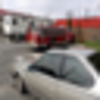

In [96]:
show((data + 1) / 2).resize((100, 100))

##### Dataloader是一个可迭代的对象，它将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。

        car         car        frog        deer


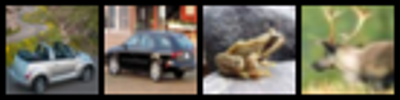

In [97]:
dataiter = iter(trainloader)
images, labels = dataiter.__next__()
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images +1)/ 2)).resize((400, 100))

### 定义网络

In [105]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #因为输入是三通道的图
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        #x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

net = Net()
print(net)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 定义损失函数 和 优化器

In [106]:
from  torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

### 训练网络

* 输入数据
* 前向传播 + 后向传播
* 更新参数

In [107]:
t.set_num_threads(8) #设置 线程数

for epoch in range(2): #训练数据集的参数

    running_los = 0.0
    for i, data in enumerate(trainloader, 0): #enumerate的返回值第一个是 batch的地址， 第二个是train_ids
        #输入数据
        inputs, labels = data

        #梯度清零
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        #update parameters
        optimizer.step()

        #打印log信息
        #loss是一个scalar，需要loss.item()来获取数值， 不能使用loss[0]
        running_los += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss : %.3f'\
                  % (epoch+1, i+1, running_los / 2000))
            running_los = 0.0
print('Finished Training')

[1,  2000] loss : 2.080
[1,  4000] loss : 2.001
[1,  6000] loss : 1.976
[1,  8000] loss : 1.952
[1, 10000] loss : 1.953
[1, 12000] loss : 1.943
[2,  2000] loss : 1.961
[2,  4000] loss : 1.953
[2,  6000] loss : 1.983
[2,  8000] loss : 2.053
[2, 10000] loss : 2.049
[2, 12000] loss : 2.064
Finished Training


实际的label :     truck     deer    truck     deer


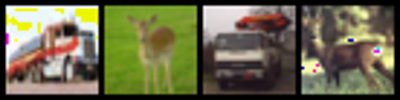

In [108]:
dataiter = iter(testloader)
images, labels = dataiter.__next__()
print('实际的label : ', ' '.join(\
    '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400, 100))